# Variables and functions required for GA

In [9]:
target_word = 'Vinayak Verma'
population_size = 20
mutationRate = 10 # between 0 - 100%

def string_to_list(String):
    
    string_list = []
    
    for x in String:
        string_list.append(x)
        
    return string_list

def list_to_string(List):
    String = ''
    
    for x in List:
        String += str(x)
        
    return String

def target_check(population):
    '''
    checks whether an individual in the population possess the correct gene
    '''
    for x in population:
        if x.fitness == 100:
            return True
    
    return False

def print_population(population):
    
    for x in population:
        print (x.genes, x.fitness)
        
def print_fittest_individual(population):
    
    fittest_individual = population[0]
    
    for x in population:
        for j in population:
            if j.fitness > fittest_individual.fitness:
                fittest_individual = j
                
    print ('fittest individual:', fittest_individual.genes, fittest_individual.fitness) 

# Initialize Population

In [10]:
import random 
import string

class individual (object):
    def __init__(self, target):
        # Create Genes
        self.genes = ''
        for i in range(len(target)): 
            string_list = string.ascii_lowercase + string.whitespace[0]
            self.genes += random.choice(string_list)
            
    def calculate_fitness(self):
        # Calculate fitness
        total_char = len(target_word)
        correct_char = 0
        
            # Calculate corect_char
        for i in range(len(target_word)):
            if self.genes[i] == target_word[i]:
                correct_char += 1
            
        
        self.fitness = int(correct_char / total_char * 100)
        
    def crossover(self, other):
        '''
        Crossover over gene data of two parents
        
        parameters
        ----------
        
        self - parent1
        
        other - parent2
        
        population_size - amount of children wanted
        
        returns
        -------
        
        children - list containing the children
        '''
        
        midpoint = random.randint(0, len(self.genes) - 1)
        
        child_gene = ''
        for i in range(len(self.genes)):
            if i < midpoint:
                child_gene += self.genes[i]
            else:
                child_gene += other.genes[i]
        
        return child_gene
    
    def mutate(self):
        '''
        Mutate the child gene by random altering one of the gene elements of the child
        
        parameters
        ----------
        
        returns
        -------
        
        '''
        
        if random.randrange(0, 100) <= mutationRate:
            string_list = string.ascii_lowercase + string.whitespace[0]
            
            # Convert gene string to list
            child_genes_list = string_to_list(self.genes)
            
            # mutate gene element
            child_genes_list[random.randrange(0, len(child_genes_list))] = random.choice(string_list)
        
            # convert gene list back to string
            self.genes = list_to_string(child_genes_list)
    
def create_population(no_of_population, population_object, target):
        
    if no_of_population == 1:
        return [population_object(target)]
        
    return [population_object(target)] + create_population(no_of_population - 1, population_object, target)


# Selection

In [11]:
def create_mating_pool(population):
    '''
    Add individuals to the mating pool based off their fitness score
    
    Parameters
    ----------
    
    population - list containing individual objects
    
    Returns
    -------
    
    mating_pool - list containing the mating pool to select parents from
    '''
    mating_pool = []
    
    for x in population:
        x.calculate_fitness()
    
    for i in population:
        
        # append the indivudual multiple times in the pool based
        # off their fitness
        
        for x in range(i.fitness):
            mating_pool.append(i)
            

    return mating_pool

# Reproduction

In [12]:


# replace previous population with new children
def reproduce(population, mating_pool):
    for x in range(len(population)):

        parent1 = random.choice(mating_pool)
        parent2 = random.choice(mating_pool)

        child_genes = parent1.crossover(parent2)
        child = individual(target_word)
        child.genes = child_genes
        child.mutate()
        child.calculate_fitness()

        population[x] = child

    return population

# Bringing it together

In [13]:
def ga_model(pop_size):
    # Initialize population
    population = create_population(pop_size, individual, target_word)
    target_reached = False

    while(target_reached == False):

        # Selection
        mating_pool = create_mating_pool(population)

        # Reproduction
        new_population = reproduce(population, mating_pool)

        # Print population
            #print_population(new_population)

        # print fittest individual of population
        #print_fittest_individual(new_population)

        # Check whether target reached
        target_reached = target_check(new_population)
        


In [14]:
import time

target_word = 'aristotle pone pule'

# variable for graph
x_data = []
y_data = []

for x in range (50, 1000, 50):
    
    tic = time.perf_counter()
    
    ga_model(x)
    
    toc = time.perf_counter()
    
    x_data.append(toc - tic)
    y_data.append(x)
    print ('population size:', x)
    print ('execution time:', toc - tic, 's')

population size: 50
execution time: 16.21765419999997 s
population size: 100
execution time: 1.8212539999999535 s
population size: 150
execution time: 0.5518873999999414 s
population size: 200
execution time: 0.8819406000000072 s
population size: 250
execution time: 0.7000477000000274 s
population size: 300
execution time: 0.7814988000000085 s
population size: 350
execution time: 0.5850791000000299 s
population size: 400
execution time: 0.6322626999999557 s
population size: 450
execution time: 1.2434293999999682 s
population size: 500
execution time: 1.266784199999961 s
population size: 550
execution time: 0.7247072000000117 s
population size: 600
execution time: 0.7691787999999633 s
population size: 650
execution time: 0.8023405000000139 s
population size: 700
execution time: 1.1067120999999815 s
population size: 750
execution time: 1.0789389000000256 s
population size: 800
execution time: 0.826310000000035 s
population size: 850
execution time: 1.2397746999999981 s
population size: 9

[16.21765419999997, 1.8212539999999535, 0.5518873999999414, 0.8819406000000072, 0.7000477000000274, 0.7814988000000085, 0.5850791000000299, 0.6322626999999557, 1.2434293999999682, 1.266784199999961, 0.7247072000000117, 0.7691787999999633, 0.8023405000000139, 1.1067120999999815, 1.0789389000000256, 0.826310000000035, 1.2397746999999981, 1.1313210000000709, 1.9075679999999693]
[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]


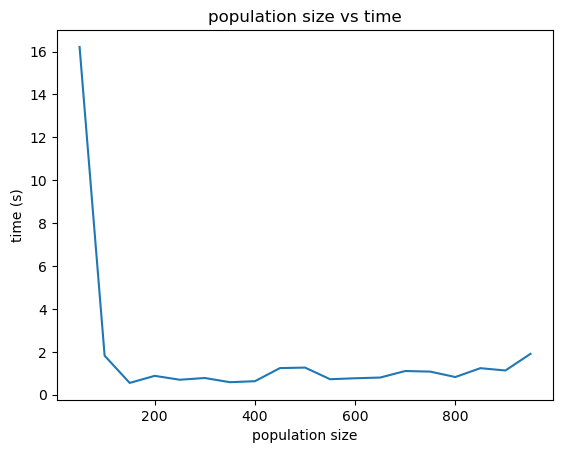

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
print (x_data)
print (y_data)
plt.plot(y_data,x_data)
plt.ylabel("time (s)")
plt.xlabel("population size")
plt.title('population size vs time')
plt.show()